In [681]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 50)

In [682]:
# load the dataset
df = pd.read_csv('../../Data Analytics/datasets/Heart Disease/processed.cleveland.data')

In [ ]:
df.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Feature Names

- **age**
- **sex**
- **cp**, chest pain
- **restbps**, resting blood pressure (in mm Hg)
- **chol**, cholestrol
- **fbs**, fasting blood sugar
- **restecg**, resting electrocardiographic results
- **thalach**, maximum heart rate achieved
- **exang**, exercise included angina
- **oldpeak**, ST depression induced by exercise relative to rest
- **slope**, the slope of the peak exercise ST segment
- **ca**, number of major vessels (0-3) colored by fluoroscopy
- **thal**, short for thallium heart scan
- **hd**, diagnosis of heart disease, the predicted attribute


## Understanding the Data

In [ ]:
df.shape

(303, 14)

In [ ]:
# check the data types
df.dtypes

age        float64
sex        float64
cp         float64
restbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [ ]:
# check out what's going on in the features ca and thal

df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [ ]:
df['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

In [ ]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [ ]:
df['thal'].value_counts()   # 2 missing values      

thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64

## Dealing with the Missing Data

In [ ]:
# check for null values in all of the features
df.isna().sum()

age        0
sex        0
cp         0
restbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [ ]:
# print out the rows that contain wrong format values for ca and thal features
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


**6** out of **303** rows, contain missing data, which is about 2% of the dataset. So, we'll remove the rows with missing values instead of trying to impute their values

In [ ]:
# update the df with no missing values
df = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [ ]:
df.shape    # removed 6 rows with missing values

(297, 14)

## Format the data for Decision Tree

In [ ]:
# create the features and label
X,y = df.iloc[:, :-1].copy(), df.iloc[:, -1].copy()

### One-hot encode categorical variables

We want to convert **cp** categories into 4 different categorical features namely
1. typical angine
2. atypical angina
3. non-anginal pain
4. asymptomatic

and do the same for other categorical features also

In [ ]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [ ]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'ca', 'thal'])

In [ ]:
X_encoded.head()

,age,sex,restbps,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,False,False,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,False,False,True,False,True,False,False,False,False,True,True,False,False,False,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,False,True,False,False,False,False,True,True,False,False,True,False,False,False,True,False,False


In [ ]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

The output feature contains different degrees of heart disease as categories. But for the sake of simplicity, convert the labels to **0s** (doesn't have heart disease) and **1s** (has heart disease)

In [ ]:
y[y > 0] = 1    # set each non-zero value to 1
y.unique()

array([0, 1], dtype=int64)

## Build a preliminary Classification Tree

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [ ]:
# create decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

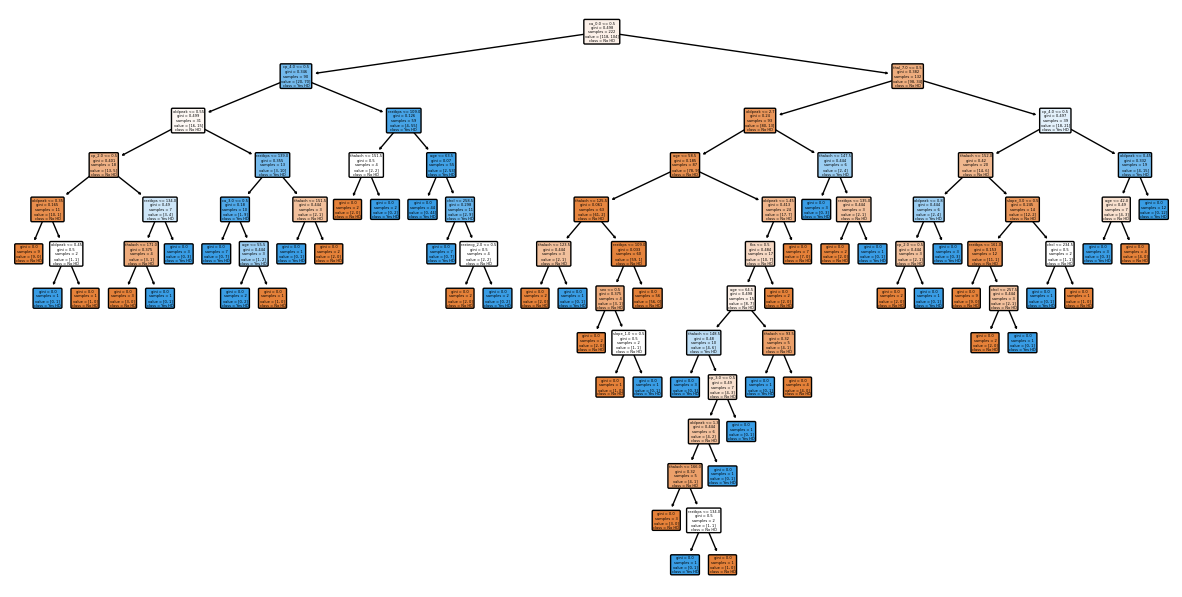

In [ ]:
# draw the decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns)
plt.show()

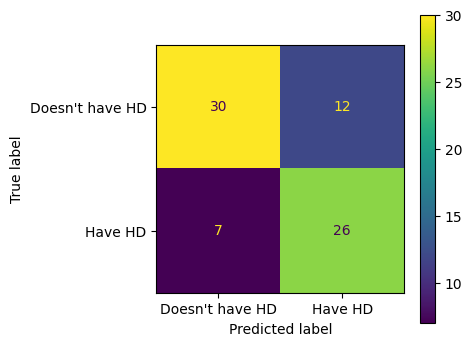

In [ ]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(4, 4))
cm_plot = ConfusionMatrixDisplay(cm, display_labels=["Doesn't have HD", "Have HD"])
cm_plot.plot(ax=ax)
plt.show()

## Cost Complexity Pruning

Goal is to find the optimal value of alpha, which is the hyperparameter for pruning.

In [ ]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas    # extract different values for alpha
ccp_alphas = ccp_alphas[:-1]    # remove the max value

clf_dts = [] # create an array to store dt for different alphas
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

Graph the accuracy of trees using the **Training Dataset** and the **Testing Dataset** as a function of alpha

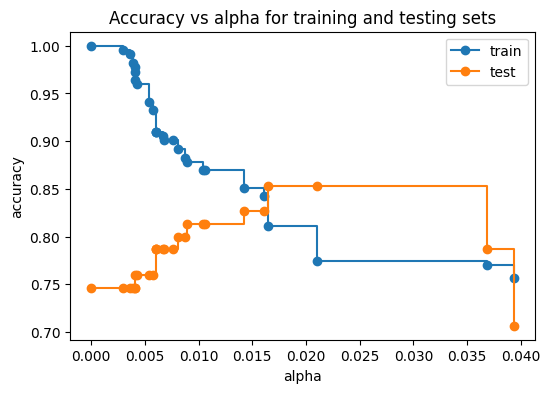

In [ ]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

We see that the accuracy for the **Testing** dataset hits maximum when the value of alpha is around 0.016

## Cross Validation to find the best alpha

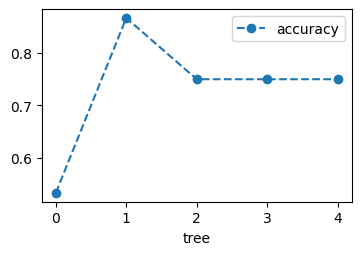

In [ ]:
from sklearn.model_selection import cross_val_score

clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)

# use 5-fold cross validation
fig, ax = plt.subplots(figsize=(4, 2.5))
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
cv_df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
cv_df.plot(x='tree', y='accuracy', marker='o', linestyle='--', ax=ax)
plt.show()

So, its still not the most optimal tree when the value of alpha is 0.016

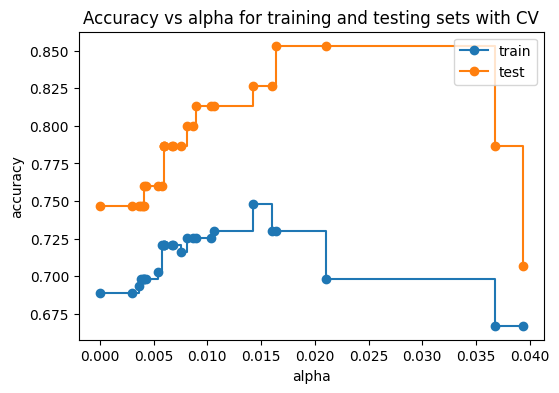

In [ ]:
alpha_loop_values = [] # find the optimal alpha after cross validation 

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append((ccp_alpha, np.mean(scores), np.std(scores)))

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets with CV')
ax.plot(ccp_alphas, [alv[1] for alv in alpha_loop_values], marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [ ]:
# get a closer look at the alpha with the highest accuracy in the training set
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean', 'std'])
alpha_results[alpha_results['mean'] >= 0.74]

,alpha,mean,std
21,0.014225,0.747778,0.091395


In [ ]:
# store the ideal ccp alpha
ideal_ccp_alpha = alpha_results[alpha_results['mean'] >= 0.74]['alpha']
ideal_ccp_alpha = float(ideal_ccp_alpha.iloc[0]) # convert to float
ideal_ccp_alpha

0.014224751066856332

## Building, Evaluating, Drawing, and Interpreting the Final Classification Tree

In [ ]:
# build the new tree with the ideal alpha as ccp alpha
clf_dt_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.014224751066856332, random_state=0)

Draw another confusion matrix to see if pruning improved the model

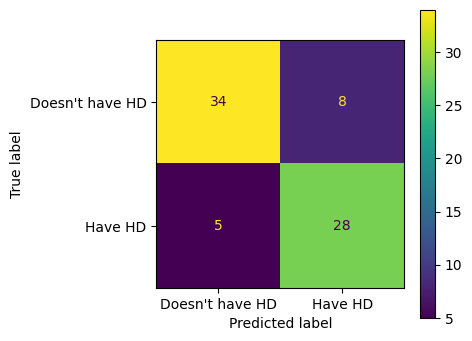

In [ ]:
cm = confusion_matrix(y_test, clf_dt_pruned.predict(X_test))
fig, ax = plt.subplots(figsize=(4, 4))
cm_plot = ConfusionMatrixDisplay(cm, display_labels=["Doesn't have HD", "Have HD"])
cm_plot.plot(ax=ax)
plt.show()

- Of the **34 + 8 = 42** people who doesn't have a heart disease, **34 (81%)** were correctly classified. This is an improvement by **7%** over full sized tree
- Of the **5 + 28 = 33** people with a heart disease, **28 (85%)** were correctly classified. This is an improvement by **6%** over full sized tree

Better Overall!

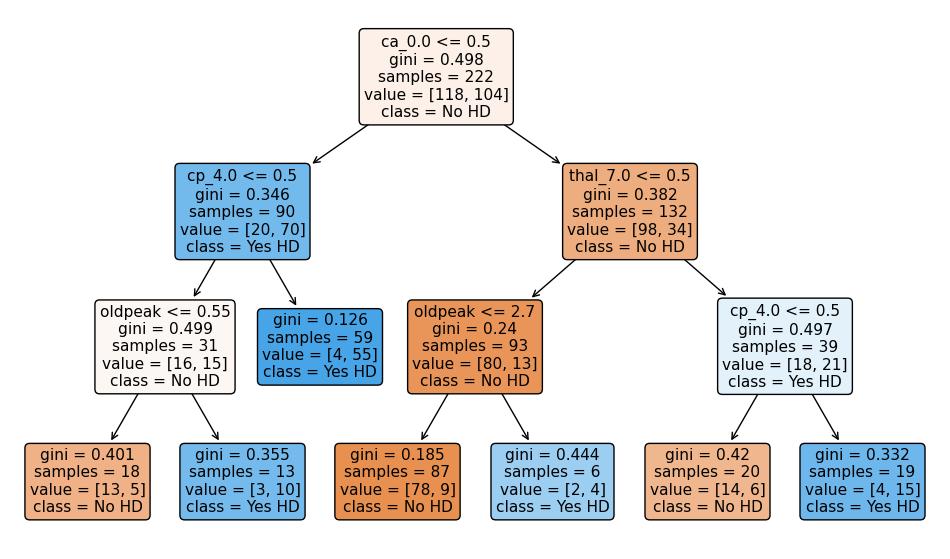

In [ ]:
# draw the pruned decision tree classifer
plt.figure(figsize=(12, 7))
plot_tree(clf_dt_pruned,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns);